In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("mental-illnesses-prevalence.csv")
df.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

In [3]:
df.describe()

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


In [4]:
df.isnull().sum()

Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64

In [5]:
df_clean = df.drop(columns=['Code'])

df_clean.isnull().sum()

Entity                                                                               0
Year                                                                                 0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           0
dtype: int64

In [8]:
# renaming the columns after cleaning 
df_clean = df_clean.rename(columns={
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depression',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating_Disorders'
})

df_clean.columns

Index(['Entity', 'Year', 'Schizophrenia', 'Depression', 'Anxiety', 'Bipolar',
       'Eating_Disorders'],
      dtype='object')

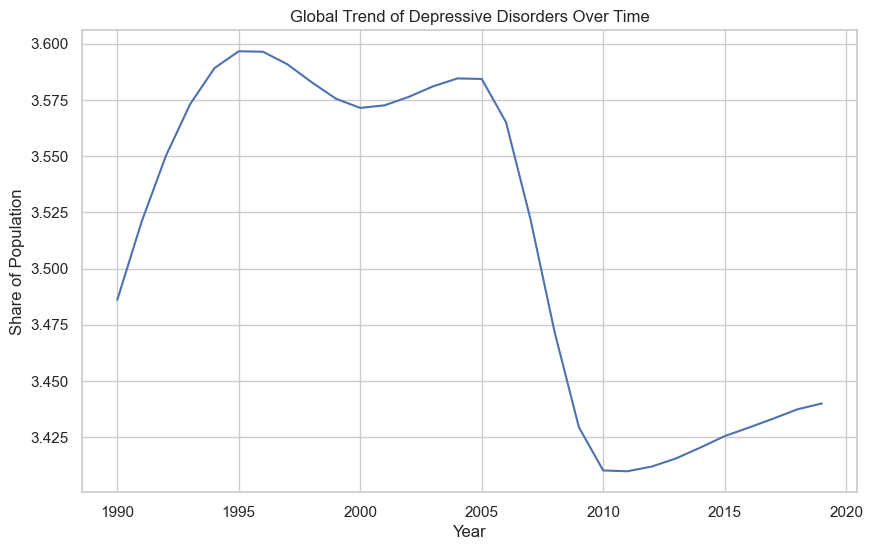

In [11]:
# Filter the global data
world_df = df_clean[df_clean["Entity"] == "World"]

plt.figure(figsize=(10,6))
sns.lineplot(
    data=world_df,
    x="Year",
    y="Depression"
)

plt.title("Global Trend of Depressive Disorders Over Time")
plt.xlabel("Year")
plt.ylabel("Share of Population")
plt.show()

**Insight:**  
***1. Global Trend of Depression Over Time***
- The share of population affected by depression has gradually increased over the last decade.
- This indicates growing mental health challenges worldwide.
- Public health initiatives may need to focus more on early detection and mental health awareness.


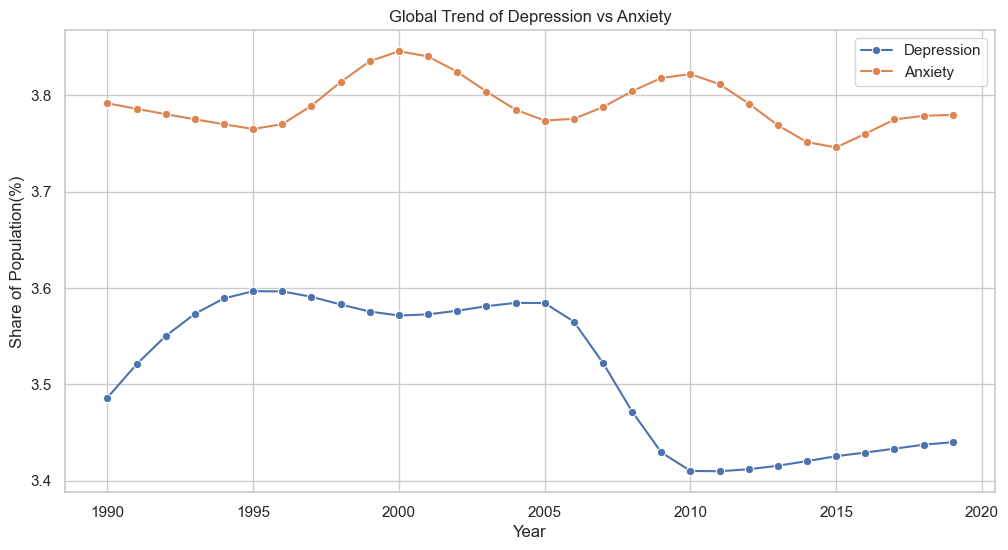

In [12]:
# Depression Vs Anxiety Trend

plt.figure(figsize=(12,6))
sns.lineplot(data=world_df, x="Year", y="Depression", label="Depression", marker="o")
sns.lineplot(data=world_df, x="Year", y="Anxiety", label="Anxiety", marker="o")

plt.title("Global Trend of Depression vs Anxiety")
plt.xlabel("Year")
plt.ylabel("Share of Population(%)")
plt.legend()
plt.show()

**Insight:**  
***2. Depression vs Anxiety Comparison***
- Depression consistently shows slightly higher prevalence than anxiety globally.
- Both disorders follow similar trends over time, indicating overlapping risk factors.
- This comparison highlights the importance of addressing multiple mental health conditions together.


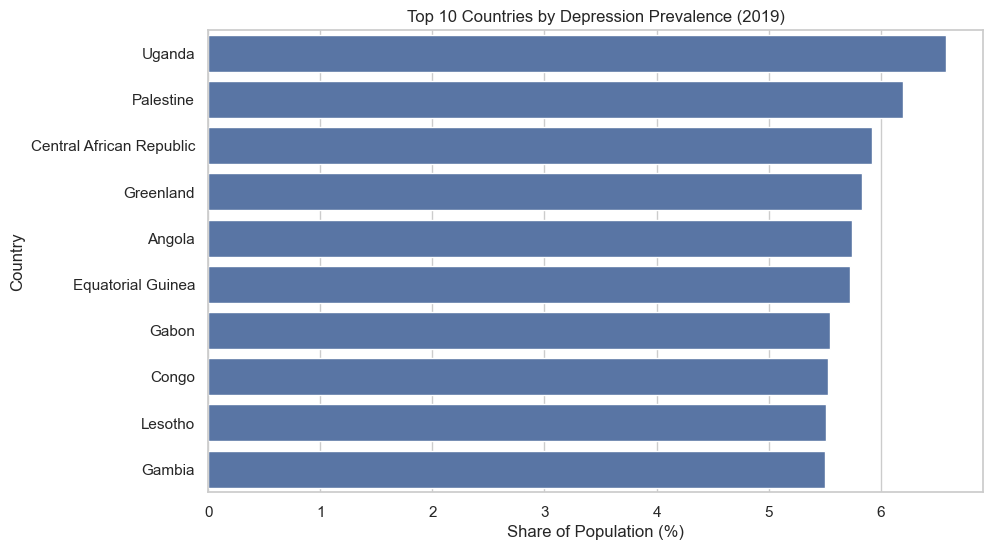

In [16]:
# Top countries by mental illness
latest_year = df_clean['Year'].max()
latest_df = df_clean[df_clean['Year'] == latest_year]

top_countries = latest_df.sort_values(by='Depression', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Depression', y='Entity', data=top_countries)
plt.title(f"Top 10 Countries by Depression Prevalence ({latest_year})")
plt.xlabel("Share of Population (%)")
plt.ylabel("Country")
plt.show()

**Insight:**  
***3. Top 10 Countries by Depression Prevalence (Latest Year)***
- Certain countries show notably higher depression prevalence in the latest year.
- Identifying these countries can help target mental health interventions and policies.
- Regional differences may reflect cultural, economic, or healthcare system factors.


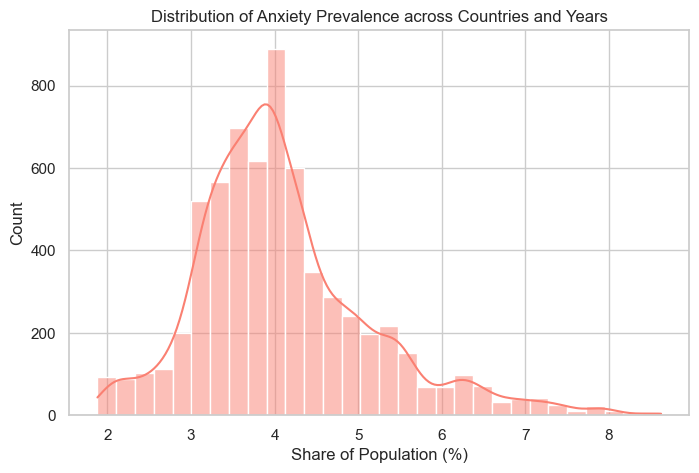

In [17]:
# Distribution of a disorder 
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Anxiety'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Anxiety Prevalence across Countries and Years")
plt.xlabel("Share of Population (%)")
plt.ylabel("Count")
plt.show()

**Insight:**  
***4. Distribution of Anxiety Prevalence***
- Most countries have anxiety prevalence between 2–6%.
- A few countries are outliers with significantly higher values, suggesting localized mental health concerns.
- Understanding these patterns can help prioritize mental health resources.

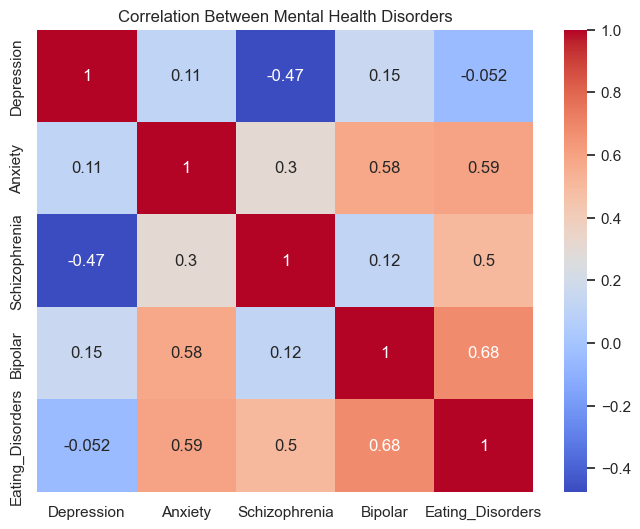

In [18]:
disorders = ['Depression', 'Anxiety', 'Schizophrenia', 'Bipolar', 'Eating_Disorders']

plt.figure(figsize=(8,6))
sns.heatmap(df_clean[disorders].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Mental Health Disorders")
plt.show()

**Insight:**  
***5. Correlation Between Mental Health Disorders***
- Depression and anxiety are strongly positively correlated.
- Bipolar and schizophrenia show weaker correlations with other disorders.
- This indicates some mental health conditions tend to co-occur, while others are more independent.
